In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("data/tradex.xlsx") # Reading and load the data

In [3]:
df.head() # Read the data

,Fund Number,Market Cap,Type,Risk,Assets,Turnover Ratio(%),SD,Sharpe Ratio,1YrReturn%,3YrReturn%,5YrReturn%,10YrReturn%,Expense Ratio,Star Rating
0,RF040,Large,Growth,Average,8524.94,112.0,9.51,1.91,11.08,19.29,17.00,8.82,0.82,Four
1,RF147,Large,Value,Average,942.15,26.0,10.41,1.88,11.89,18.20,14.60,9.26,0.95,Four
2,RF221,Mid-Cap,Growth,High,374.63,63.4,15.24,1.88,-4.34,12.63,13.02,12.98,1.35,Three
3,RF309,Mid-Cap,Value,Average,1478.08,6.0,9.51,1.86,7.95,16.48,15.15,7.40,0.69,Two
4,RF028,Large,Growth,Average,13634.38,5.0,10.93,1.85,11.52,21.55,19.59,8.83,1.15,Four


In [4]:
df.shape # Find number of columns and rows

(407, 14)

In [5]:
df.size  # find size od the data

5698

In [6]:
df.columns # Find the columns 

Index(['Fund Number', 'Market Cap', 'Type', 'Risk', 'Assets',
       'Turnover Ratio(%)', 'SD', 'Sharpe Ratio', '1YrReturn%', '3YrReturn%',
       '5YrReturn%', '10YrReturn%', 'Expense Ratio', 'Star Rating'],
      dtype='object')

In [7]:
df.isnull().sum() # find the null values

Fund Number          0
Market Cap           0
Type                 0
Risk                 0
Assets               0
Turnover Ratio(%)    0
SD                   0
Sharpe Ratio         0
1YrReturn%           0
3YrReturn%           0
5YrReturn%           0
10YrReturn%          0
Expense Ratio        0
Star Rating          0
dtype: int64

In [8]:
df.duplicated().sum() # Find the duplicate values

0

In [9]:
# 1. Based on the dataset, find the ideal combination of Market Cap, Type and Risk that offers the highest the 3YrReturn%.
df.describe()

,Assets,Turnover Ratio(%),SD,Sharpe Ratio,1YrReturn%,3YrReturn%,5YrReturn%,10YrReturn%,Expense Ratio
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,2055.819386,71.802457,11.394079,1.324644,7.813538,15.145799,14.303268,7.582113,1.225627
std,6777.361885,89.503894,1.769692,0.296612,5.439464,2.995588,2.330909,1.709281,0.317282
min,5.210000,0.000000,6.400000,0.170000,-14.050000,1.530000,5.060000,0.940000,0.290000
25%,115.385000,29.500000,10.225000,1.140000,4.685000,13.520000,12.925000,6.615000,1.020000
50%,413.110000,51.000000,11.020000,1.350000,8.940000,15.340000,14.550000,7.590000,1.200000
75%,1492.725000,83.500000,12.370000,1.540000,11.655000,17.085000,15.660000,8.605000,1.360000
max,106837.310000,689.000000,19.130000,1.910000,21.700000,30.890000,22.830000,17.110000,2.710000


In [10]:
df['Market Cap'].unique() # Univariate analysis

array(['Large', 'Mid-Cap', 'Small'], dtype=object)

In [11]:
df['Type'].unique()

array(['Growth', 'Value'], dtype=object)

In [12]:
df['Risk'].unique()

array(['Average', 'High', 'Low'], dtype=object)

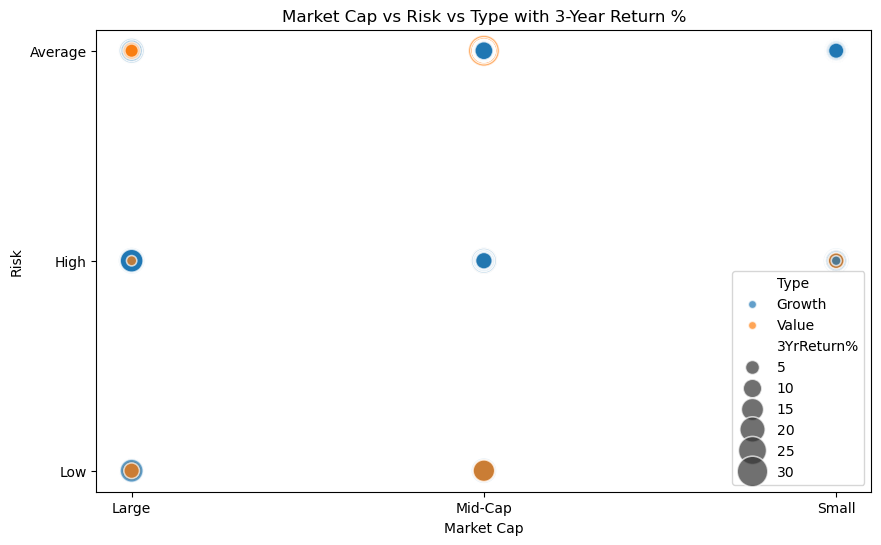

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Market Cap",
    y="Risk",
    hue="Type",              # color by Type
    size="3YrReturn%",       # bubble size by 3-Year Return
    sizes=(50, 500),         # min and max bubble size
    alpha=0.7
)

plt.title("Market Cap vs Risk vs Type with 3-Year Return %")
plt.show()


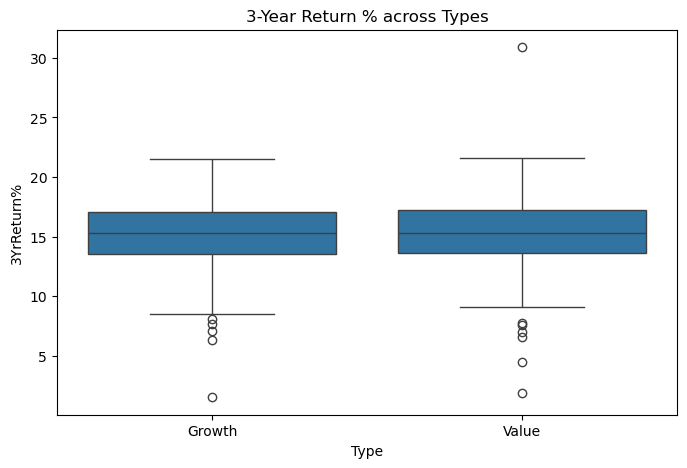

In [14]:
plt.figure(figsize=(8,5)) # Find Outliers
sns.boxplot(data=df, x="Type", y="3YrReturn%")
plt.title("3-Year Return % across Types")
plt.show()


In [15]:
Q1 = df['3YrReturn%'].quantile(0.25) # Removed outliers
Q3 = df['3YrReturn%'].quantile(0.75)
IQR = Q3 - Q1

# Filter data (remove outliers)
df_no_outliers = df[~((df['3YrReturn%'] < (Q1 - 1.5 * IQR)) | 
                      (df['3YrReturn%'] > (Q3 + 1.5 * IQR)))]

print(df_no_outliers.shape)


(395, 14)


In [16]:
df=df_no_outliers

In [17]:
df.shape


(395, 14)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4972\3016546924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Market Cap", y="3YrReturn%", palette="Set2")


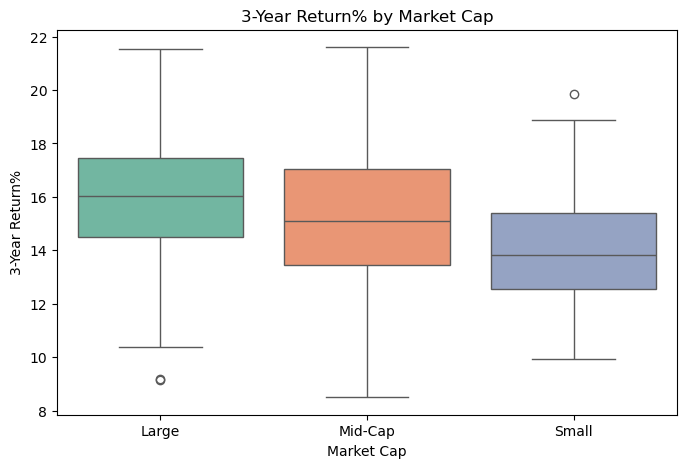

In [18]:
# plt.figure(figsize=(8,5))
# sns.boxplot(data=df, x="Market Cap", y="3YrReturn%")
# plt.title("3-Year Return % Market Cap")
# plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Market Cap", y="3YrReturn%", palette="Set2")
plt.title("3-Year Return% by Market Cap")
plt.xlabel("Market Cap")
plt.ylabel("3-Year Return%")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4972\2352702581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Market Cap", y="3YrReturn%", palette="Set2")


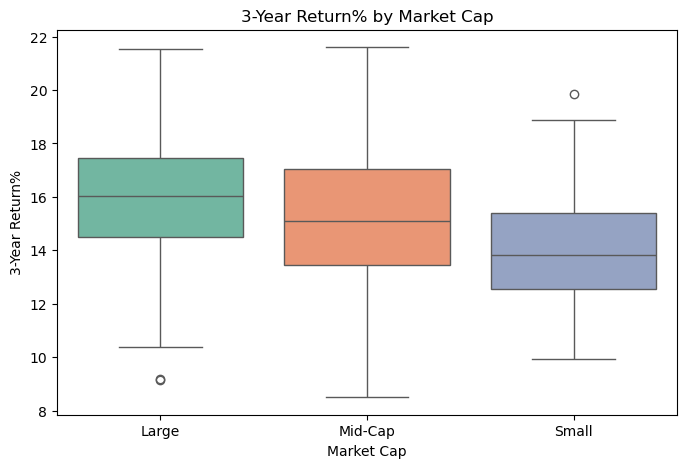

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Market Cap", y="3YrReturn%", palette="Set2")
plt.title("3-Year Return% by Market Cap")
plt.xlabel("Market Cap")
plt.ylabel("3-Year Return%")
plt.show()

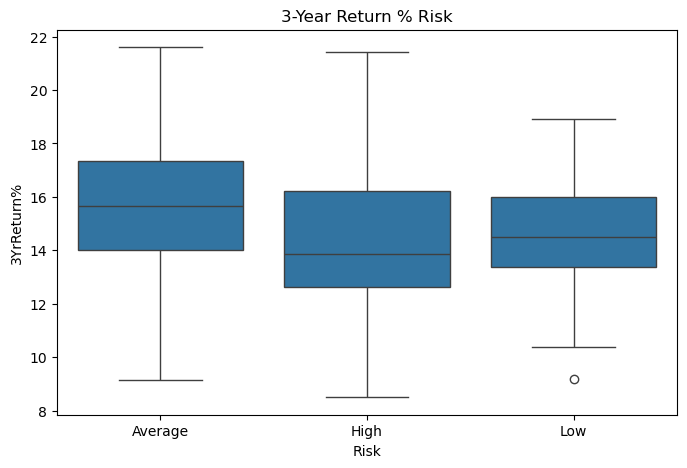

In [20]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Risk", y="3YrReturn%")
plt.title("3-Year Return % Risk")
plt.show()


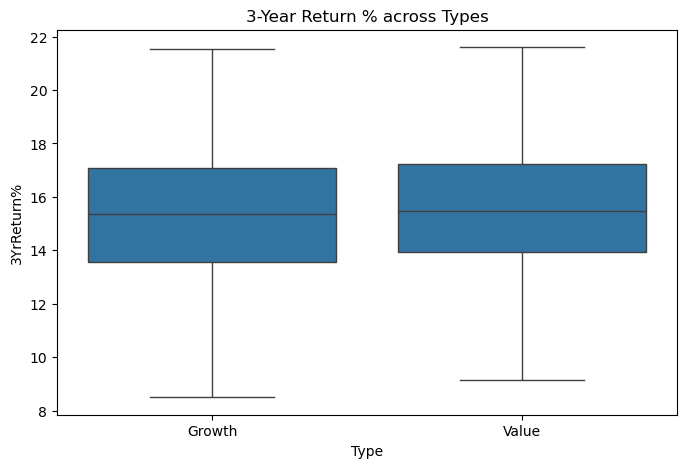

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Type", y="3YrReturn%")
plt.title("3-Year Return % across Types")
plt.show()

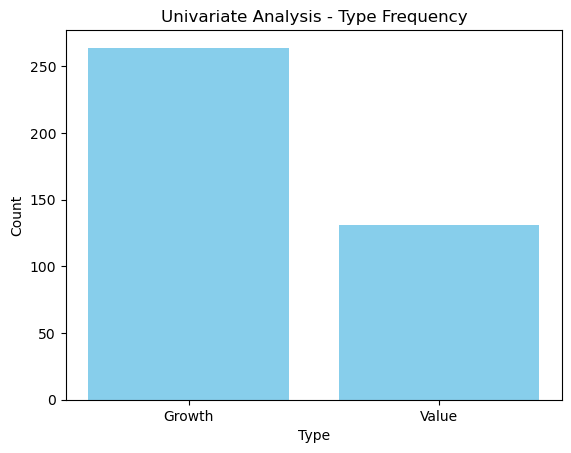

In [22]:


# Count frequency of each category
counts = df['Type'].value_counts()
# Plot
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Univariate Analysis - Type Frequency')
plt.show()


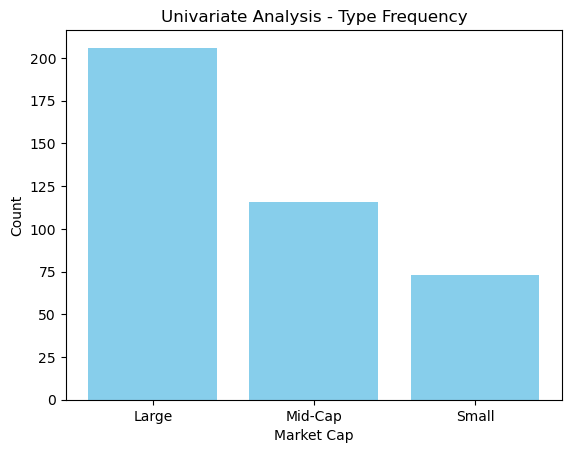

In [23]:


# Count frequency of each category
counts = df['Market Cap'].value_counts()

# Plot
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('Market Cap')
plt.ylabel('Count')
plt.title('Univariate Analysis - Type Frequency')
plt.show()


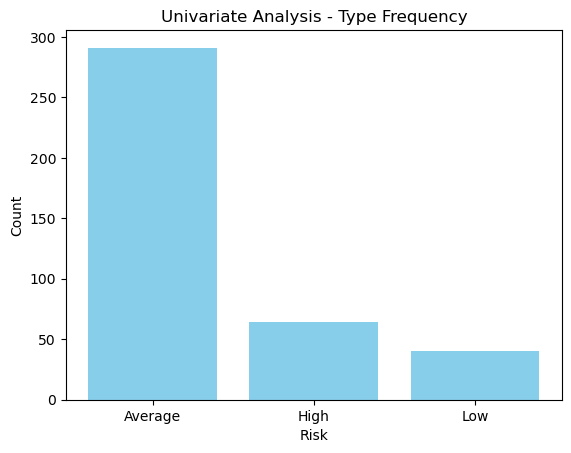

In [24]:


# Count frequency of each category
counts = df['Risk'].value_counts()

# Plot
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.title('Univariate Analysis - Type Frequency')
plt.show()


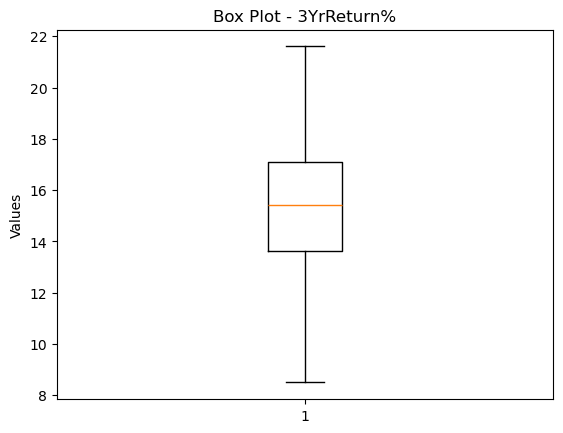

In [25]:
plt.boxplot(df['3YrReturn%'])
plt.title("Box Plot - 3YrReturn%")
plt.ylabel("Values")
plt.show()


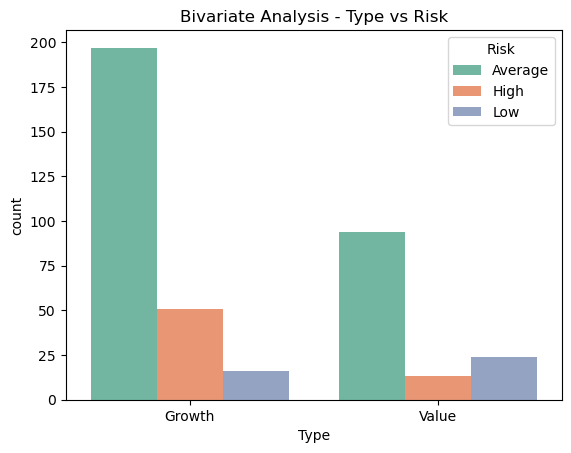

In [26]:

# Grouped bar plot
sns.countplot(x='Type', hue='Risk', data=df, palette='Set2')
plt.title("Bivariate Analysis - Type vs Risk")
plt.show()


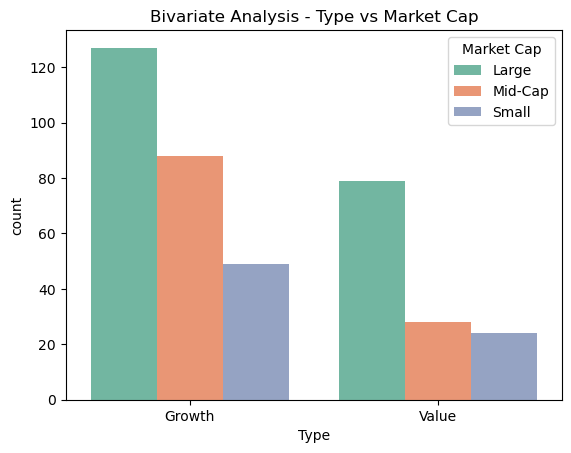

In [27]:

# Grouped bar plot
sns.countplot(x='Type', hue='Market Cap', data=df, palette='Set2')
plt.title("Bivariate Analysis - Type vs Market Cap")
plt.show()


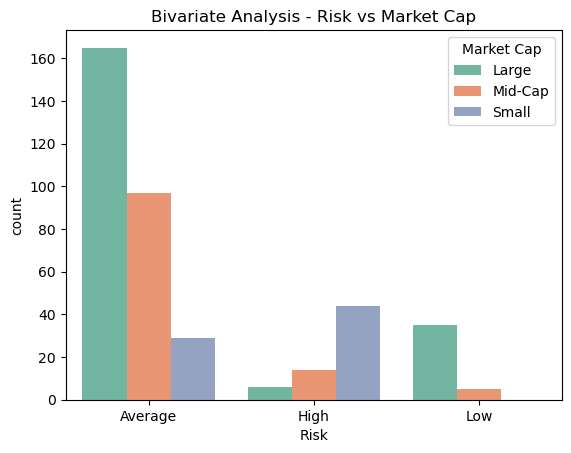

In [28]:
# Grouped bar plot
sns.countplot(x='Risk', hue='Market Cap', data=df, palette='Set2')
plt.title("Bivariate Analysis - Risk vs Market Cap")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4972\1576157979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='3YrReturn%', data=df, palette='Set2')


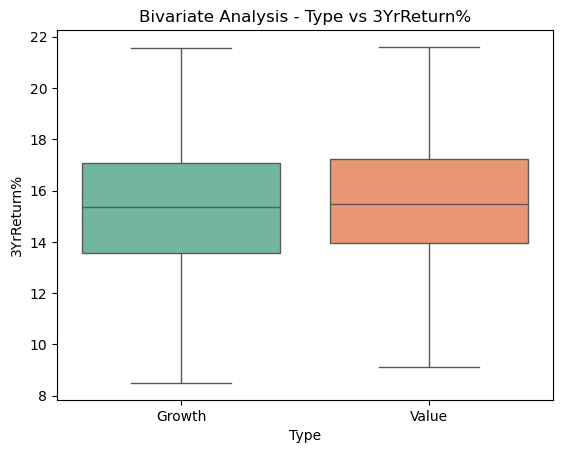

In [29]:
# Box plot
sns.boxplot(x='Type', y='3YrReturn%', data=df, palette='Set2')
plt.title("Bivariate Analysis - Type vs 3YrReturn%")
plt.show()

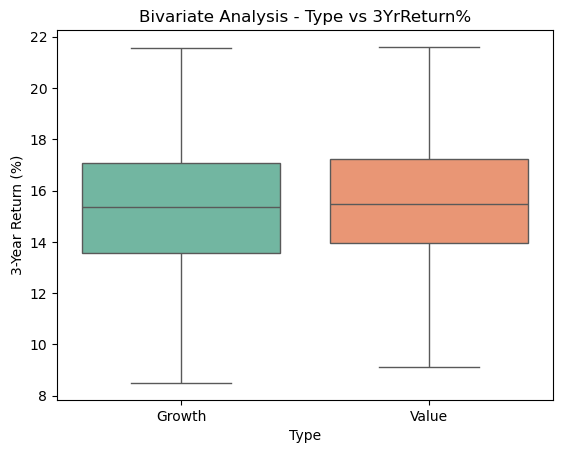

In [30]:
sns.boxplot(x='Type', y='3YrReturn%', hue='Type',
            data=df, palette='Set2', legend=False)
plt.title("Bivariate Analysis - Type vs 3YrReturn%")
plt.xlabel("Type")
plt.ylabel("3-Year Return (%)")
plt.show()


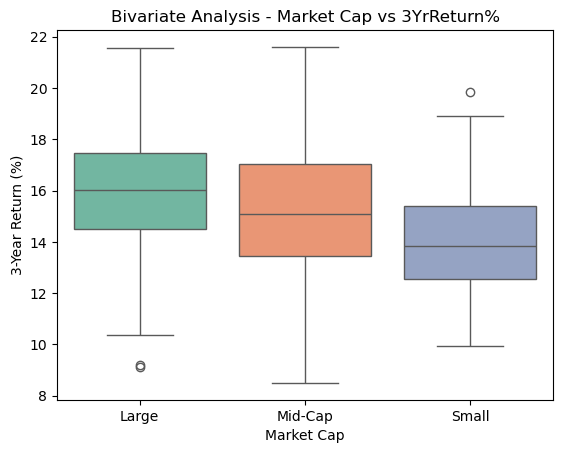

In [31]:
sns.boxplot(x='Market Cap', y='3YrReturn%', hue='Market Cap',
            data=df, palette='Set2', legend=False)
plt.title("Bivariate Analysis - Market Cap vs 3YrReturn%")
plt.xlabel("Market Cap")
plt.ylabel("3-Year Return (%)")
plt.show()


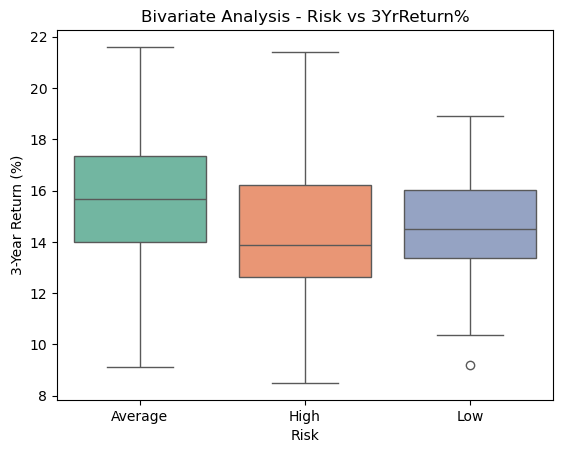

In [32]:
sns.boxplot(x='Risk', y='3YrReturn%', hue='Risk',
            data=df, palette='Set2', legend=False)
plt.title("Bivariate Analysis - Risk vs 3YrReturn%")
plt.xlabel("Risk")
plt.ylabel("3-Year Return (%)")
plt.show()


In [33]:
df["3YrReturn%"].mean()

15.360354430379747

In [34]:
df["3YrReturn%"].max()

21.6

In [35]:
df["3YrReturn%"].min()

8.5

# Solutions:
## Market Cap:Large
## Risk: Average 
## Type: Growth

<Axes: >

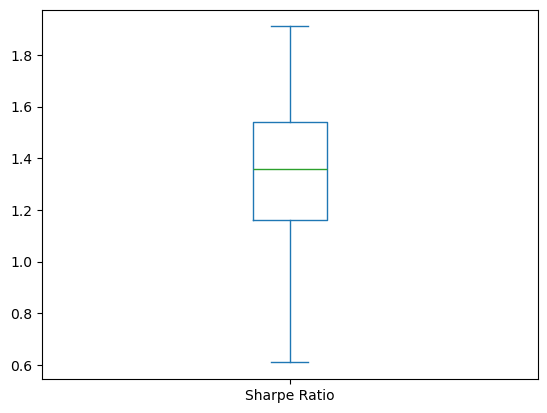

In [37]:
# 2. Based on the dataset, find the ideal Sharpe Ratio of a fund to maximize the 1YrReturn%.
df["Sharpe Ratio"].plot(kind="box")


In [38]:
df["Sharpe Ratio"].mean()

1.345620253164557

In [39]:
df["Sharpe Ratio"].median()

1.36

In [40]:
df["Sharpe Ratio"].min()

0.61

In [41]:
df["Sharpe Ratio"].max()

1.91

<Axes: >

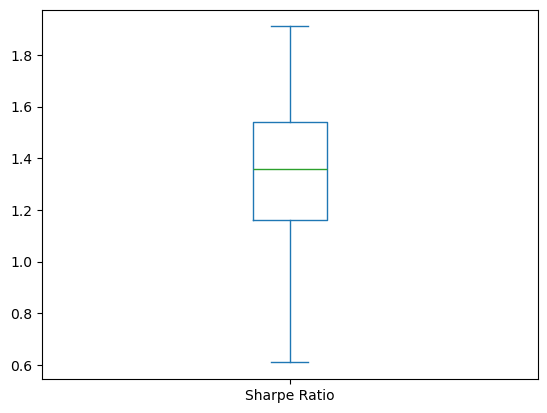

In [42]:
df["Sharpe Ratio"].plot(kind="box")


In [43]:
df["1YrReturn%"]

0      11.08
1      11.89
2      -4.34
3       7.95
4      11.52
       ...  
391    -2.70
392   -10.42
397     0.57
398     0.81
399     0.61
Name: 1YrReturn%, Length: 395, dtype: float64

In [44]:
df["1YrReturn%"].mean()

8.119164556962026

In [45]:
df["1YrReturn%"].median()

9.02

In [46]:
df["1YrReturn%"].min()

-14.05

In [47]:
df["1YrReturn%"].max()

21.7

<Axes: >

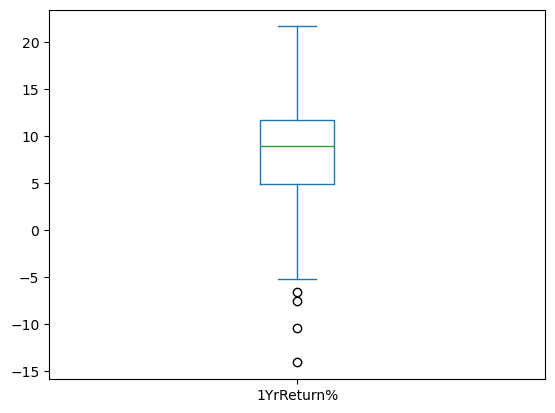

In [48]:
df["1YrReturn%"].plot(kind="box")

In [49]:
Q1 = df['1YrReturn%'].quantile(0.25)
Q3 = df['1YrReturn%'].quantile(0.75)
IQR = Q3 - Q1

# Filter data (remove outliers)
df_no_outliers = df[~((df['1YrReturn%'] < (Q1 - 1.5 * IQR)) | 
                      (df['1YrReturn%'] > (Q3 + 1.5 * IQR)))]

print(df_no_outliers.shape)


(391, 14)


In [50]:
df=df_no_outliers

<Axes: >

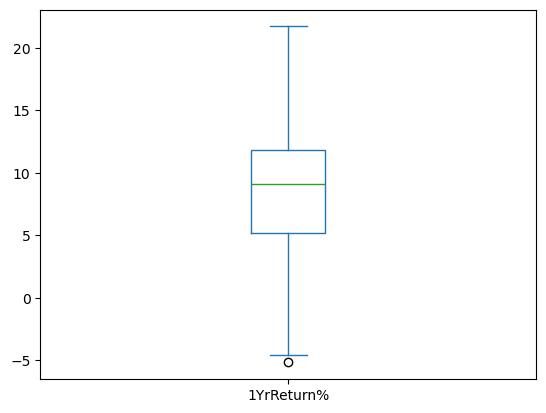

In [51]:
df["1YrReturn%"].plot(kind="box")

In [52]:
df["1YrReturn%"].mean()

8.3006905370844

In [53]:
df["1YrReturn%"].median()

9.09

In [54]:
df["1YrReturn%"].min()

-5.16

In [55]:
df["1YrReturn%"].max()

21.7

In [56]:
# Correlation
corr = df['Sharpe Ratio'].corr(df['1YrReturn%'])
print("Correlation:", corr)

Correlation: 0.7317174152917876


#### “There is a strong positive correlation (r = 0.73) between Sharpe Ratio and 1-Year Return%, indicating that funds with higher returns also tend to deliver better risk-adjusted performance.”

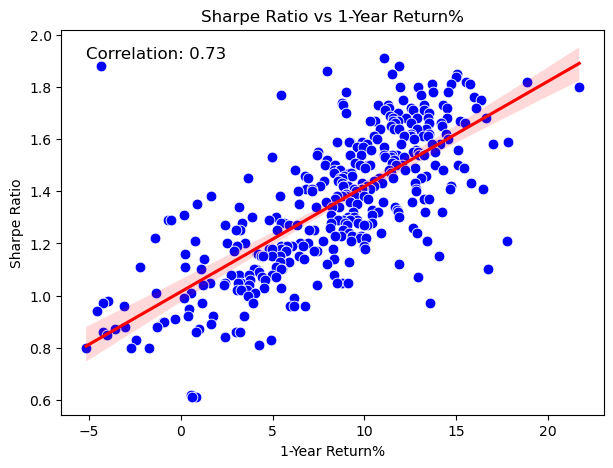

In [58]:
# Scatter plot with regression line
plt.figure(figsize=(7,5))
sns.scatterplot(x='1YrReturn%', y='Sharpe Ratio', data=df, color='blue', s=60)
sns.regplot(x='1YrReturn%', y='Sharpe Ratio', data=df, scatter=False, color='red')

# Annotate correlation
plt.text(x=df['1YrReturn%'].min(), 
         y=df['Sharpe Ratio'].max(), 
         s=f'Correlation: {corr:.2f}', 
         fontsize=12, 
         color='black')

plt.title("Sharpe Ratio vs 1-Year Return%")
plt.xlabel("1-Year Return%")
plt.ylabel("Sharpe Ratio")
plt.show()


Ideal Sharpe Ratio: 1.91
Predicted 1-Year Return%: 15.73%


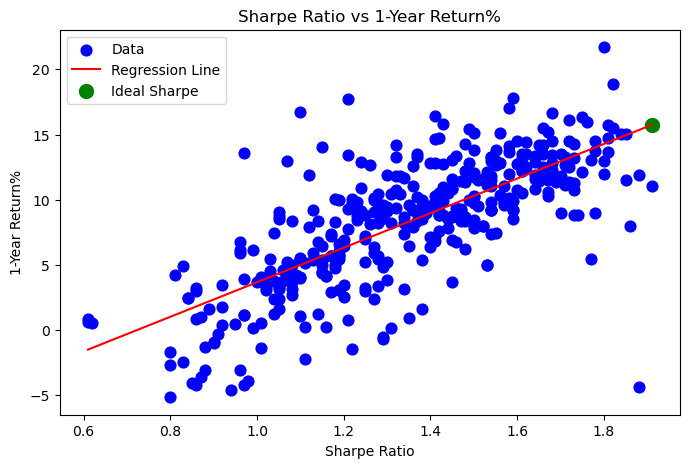

In [62]:
from sklearn.linear_model import LinearRegression
# Fit Linear Regression
X = df[['Sharpe Ratio']]  # Keep as DataFrame
y = df['1YrReturn%']
model = LinearRegression()
model.fit(X, y)

# Predict 1YrReturn% over a range of Sharpe Ratios
sharpe_range = pd.DataFrame(np.linspace(df['Sharpe Ratio'].min(), 
                                        df['Sharpe Ratio'].max(), 100), 
                            columns=['Sharpe Ratio'])
predicted_return = model.predict(sharpe_range)

# Find ideal Sharpe Ratio
max_idx = np.argmax(predicted_return)
ideal_sharpe = sharpe_range.iloc[max_idx, 0]
max_return = predicted_return[max_idx]

print(f"Ideal Sharpe Ratio: {ideal_sharpe:.2f}")
print(f"Predicted 1-Year Return%: {max_return:.2f}%")

# Plot
plt.figure(figsize=(8,5))
plt.scatter(df['Sharpe Ratio'], df['1YrReturn%'], color='blue', s=60, label='Data')
plt.plot(sharpe_range, predicted_return, color='red', label='Regression Line')
plt.scatter(ideal_sharpe, max_return, color='green', s=100, label='Ideal Sharpe')
plt.xlabel("Sharpe Ratio")
plt.ylabel("1-Year Return%")
plt.title("Sharpe Ratio vs 1-Year Return%")
plt.legend()
plt.show()


# Solutions
#### Ideal Sharpe Ratio: 1.91
#### Predicted 1-Year Return%: 15.73%
